In [1]:
import os
from paths import *
from C_0L_allattnrep import *

In [2]:
eval_out_dir = os.path.join(model_save_, "eval-C_0L-0603232108")

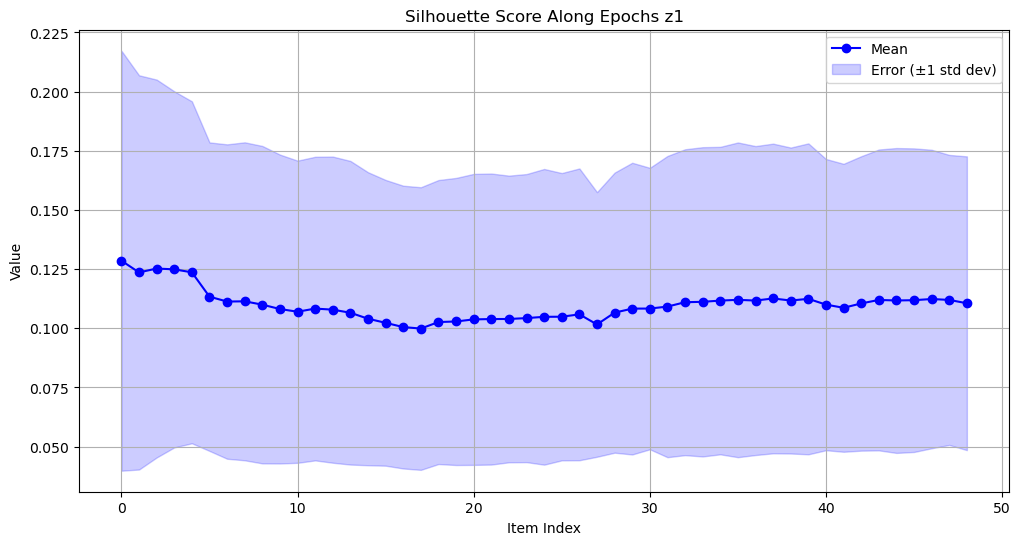

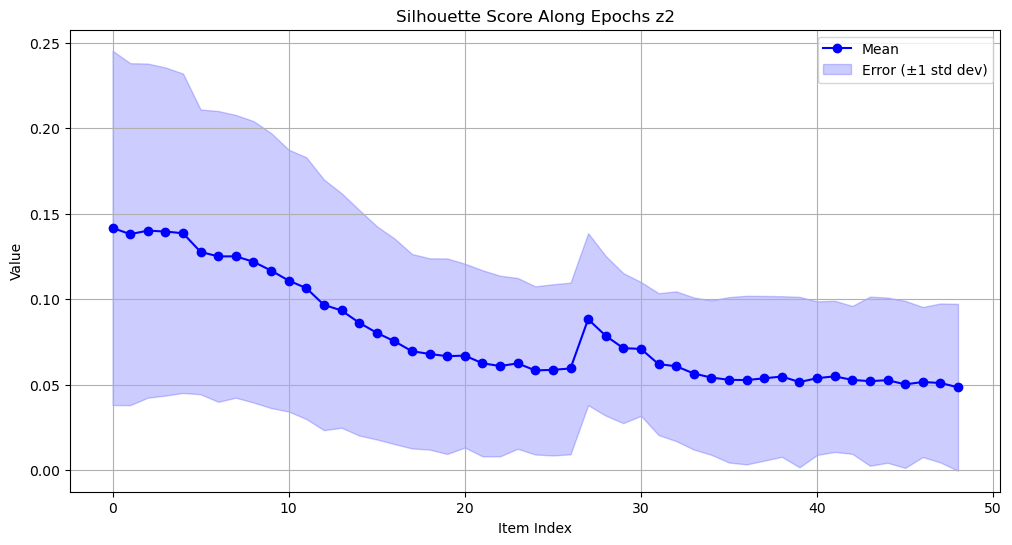

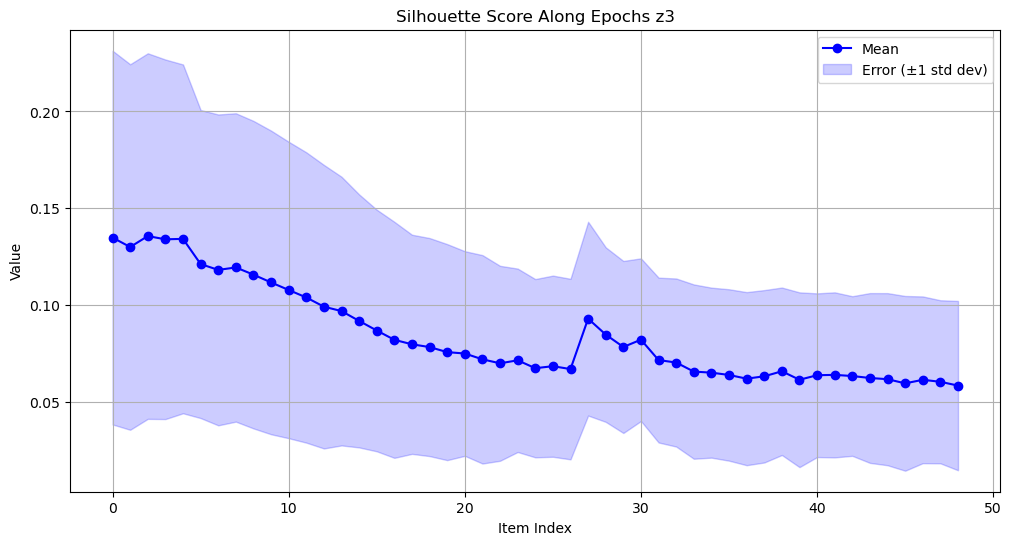

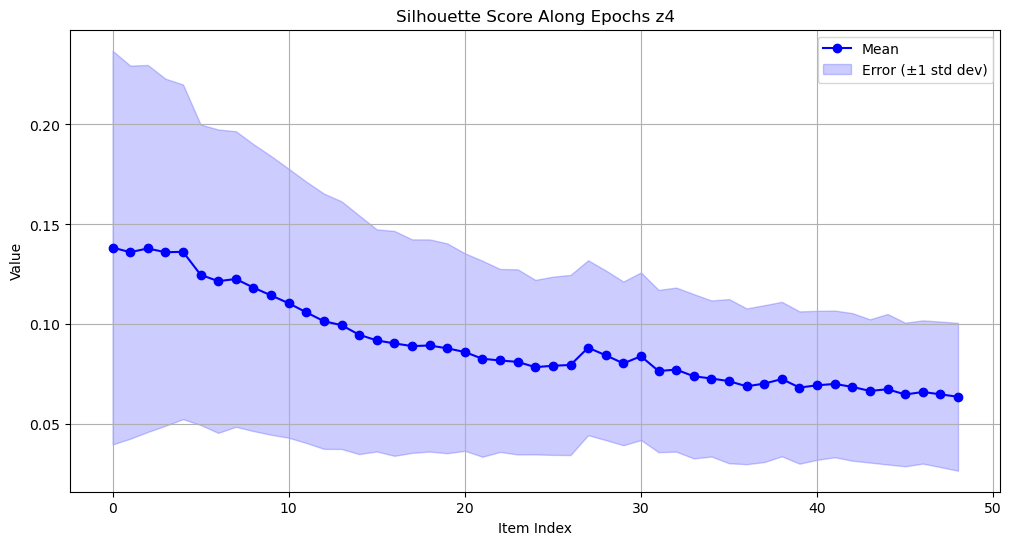

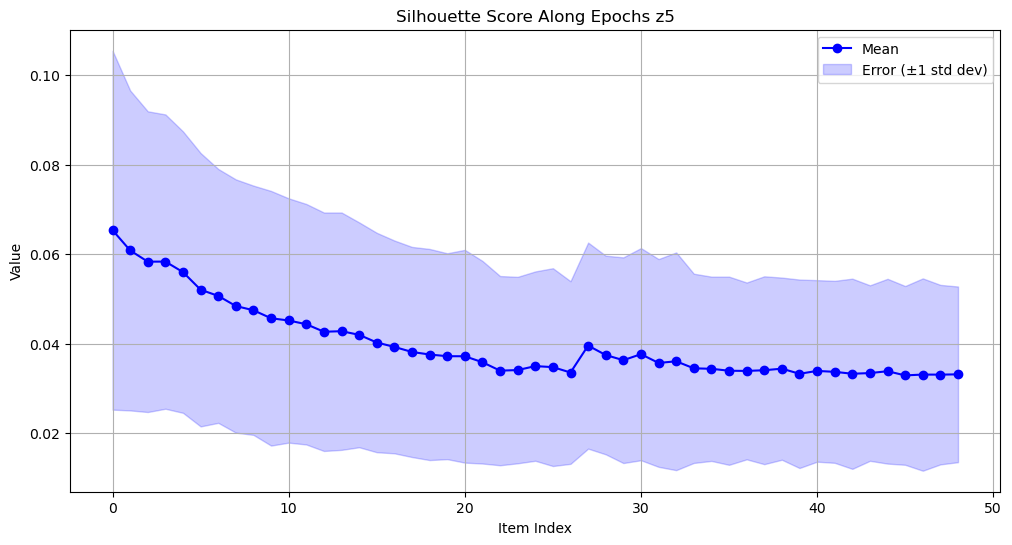

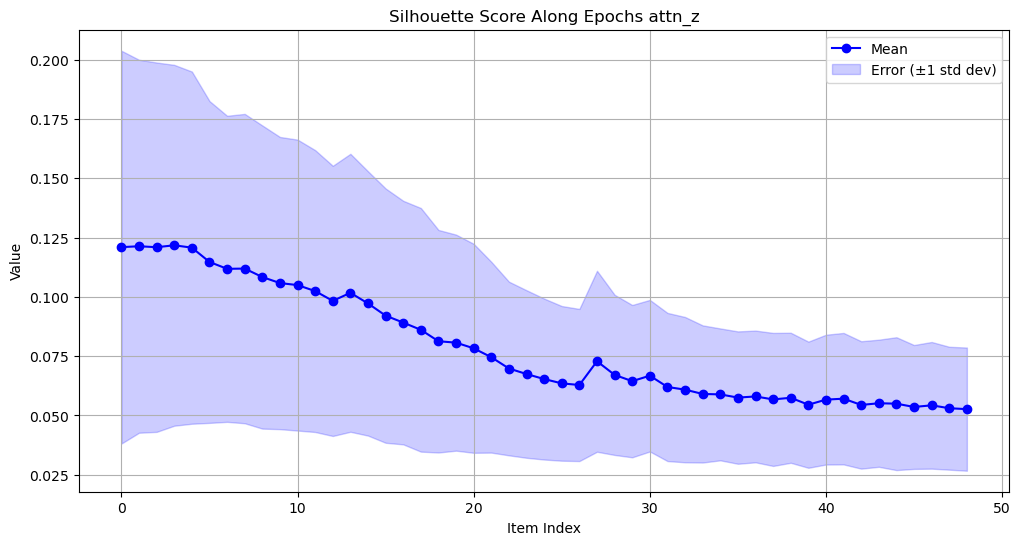

In [3]:
for z_type in ["z1", "z2", "z3", "z4", "z5", "attn_z"]: 
    for model_type in ["recon100-5l"]: 
        for condition in ["u"]: 
            for model_num in [1]: 
                res_save_dir = os.path.join(eval_out_dir, model_type, condition, str(model_num))
                sil_scores_99 = []
                for epoch in range(1, 50): 
                    sil_score_path = os.path.join(res_save_dir, f"{z_type}_sil_scores_{epoch}.pk")
                    with open(sil_score_path, "rb") as file: 
                        sil_scores = pickle.load(file)
                    sil_scores_99.append(sil_scores)

                data = np.array(sil_scores_99)

                # Calculate the mean and standard deviation for each item
                means = np.mean(data, axis=1)
                std_devs = np.std(data, axis=1)

                # Create the plot
                plt.figure(figsize=(12, 6))

                # Plot the mean
                plt.plot(means, marker='o', linestyle='-', color='b', label='Mean')

                # Plot the error as a shaded area
                plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='b', alpha=0.2, label='Error (±1 std dev)')

                # Add title and labels
                plt.title(f'Silhouette Score Along Epochs {z_type}')
                plt.xlabel('Item Index')
                plt.ylabel('Value')
                plt.legend()

                # Show the graph
                plt.grid(True)
                plt.show()

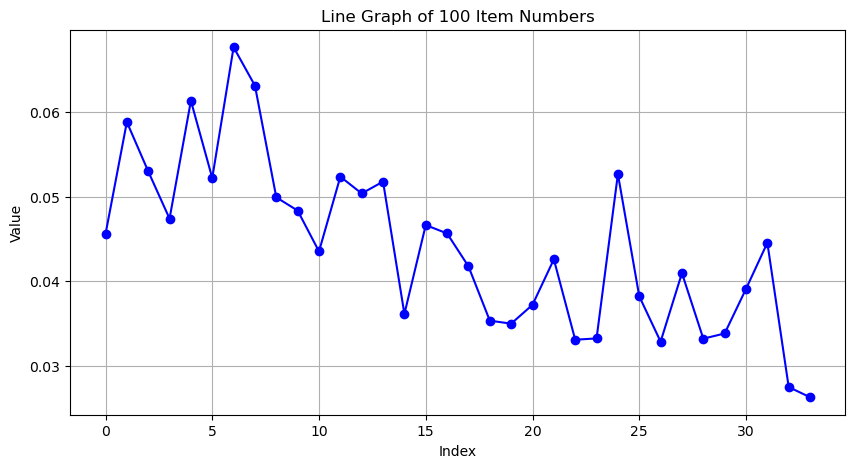

In [5]:
data = [sil[3] for sil in sil_scores_99]

plt.figure(figsize=(10, 5))
plt.plot(data, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Line Graph of 100 Item Numbers')
plt.xlabel('Index')
plt.ylabel('Value')

# Show the graph
plt.grid(True)
plt.show()

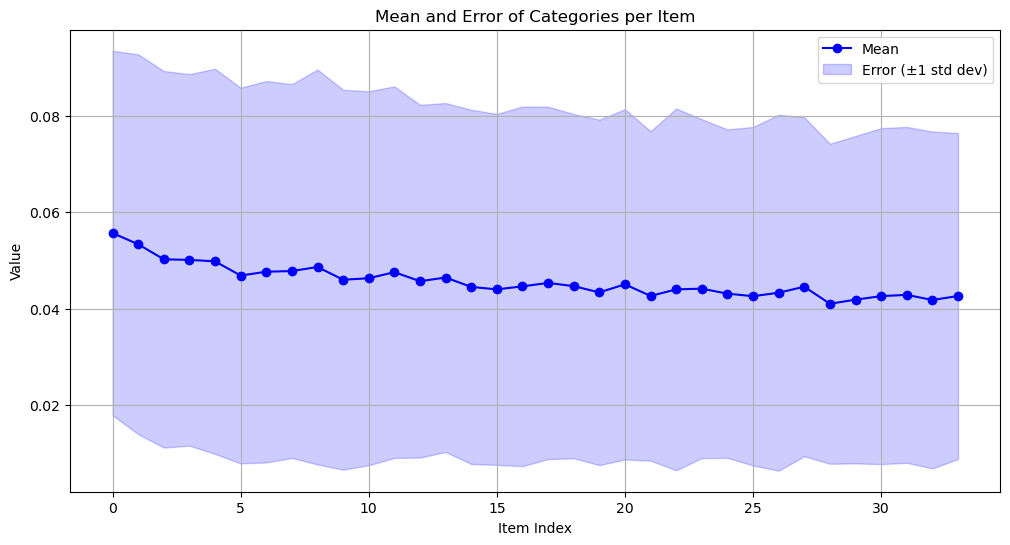

In [6]:
data = np.array(sil_scores_99)

# Calculate the mean and standard deviation for each item
means = np.mean(data, axis=1)
std_devs = np.std(data, axis=1)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the mean
plt.plot(means, marker='o', linestyle='-', color='b', label='Mean')

# Plot the error as a shaded area
plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='b', alpha=0.2, label='Error (±1 std dev)')

# Add title and labels
plt.title('Mean and Error of Categories per Item')
plt.xlabel('Item Index')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.grid(True)
plt.show()

This is even much worse than lindec. However, we observe that we have much better performance in reconstruction. 

That reminds us of the difference in performance between recon and pp tasks. Proably the recon task is really not 
good for learning phonemes. 

However, we still need to try to replicate Chung et al. to see whether it is really the task that is bad or the learning procedure or, even, the evaluation method. 

In [7]:
for model_type in ["recon100-encin"]: 
    for condition in ["u"]: 
        for model_num in [1]: 
            res_save_dir = os.path.join(eval_out_dir, model_type, condition, str(model_num))
            sil_scores_99 = []
            for epoch in range(1, 35): 
                sil_score_path = os.path.join(res_save_dir, f"attnrep_sil_scores_{epoch}.pk")
                with open(sil_score_path, "rb") as file: 
                    sil_scores = pickle.load(file)
                sil_scores_99.append(sil_scores)

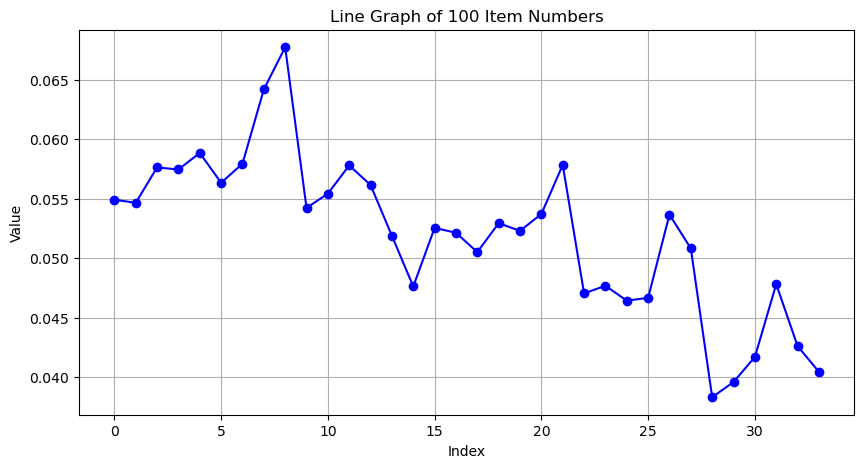

In [8]:
data = [sil[3] for sil in sil_scores_99]

plt.figure(figsize=(10, 5))
plt.plot(data, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Line Graph of 100 Item Numbers')
plt.xlabel('Index')
plt.ylabel('Value')

# Show the graph
plt.grid(True)
plt.show()

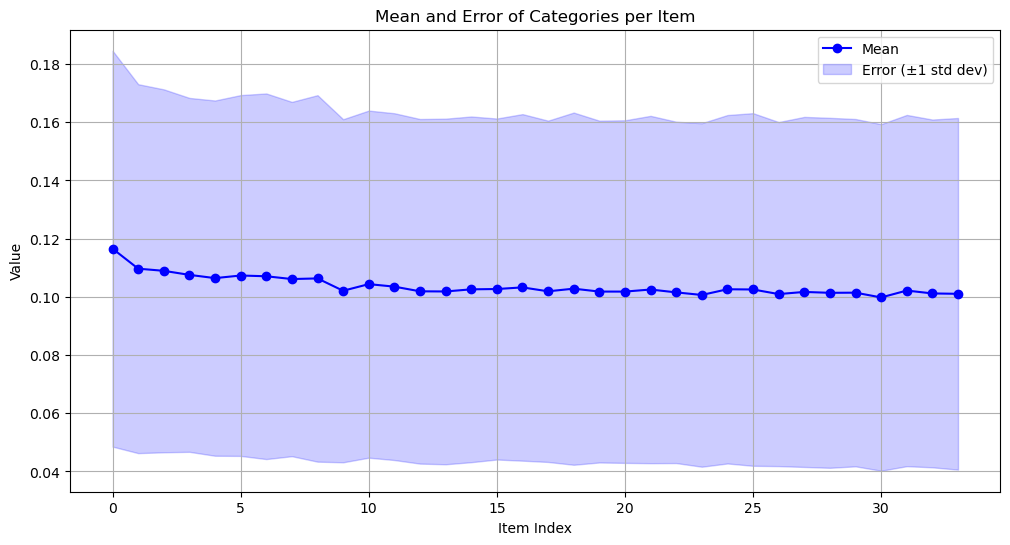

In [9]:
data = np.array(sil_scores_99)

# Calculate the mean and standard deviation for each item
means = np.mean(data, axis=1)
std_devs = np.std(data, axis=1)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the mean
plt.plot(means, marker='o', linestyle='-', color='b', label='Mean')

# Plot the error as a shaded area
plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='b', alpha=0.2, label='Error (±1 std dev)')

# Add title and labels
plt.title('Mean and Error of Categories per Item')
plt.xlabel('Item Index')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.grid(True)
plt.show()